In [5]:
import missingno
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, Birch
from yellowbrick.cluster import KElbowVisualizer

In [11]:
%matplotlib inline
plt.rcParams['font.family'] = 'monospace'
mpl.rcParams['figure.facecolor'] = '.98'
mpl.rcParams['axes.facecolor'] = '.98'
mpl.rcParams['axes.grid'] = True
mpl.rcParams['savefig.facecolor']

'auto'

In [7]:
data = pd.read_csv('marketing_campaign.csv', engine='python', sep='\\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
data.shape

(2240, 29)

People

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years

Promotion

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month

<AxesSubplot:>

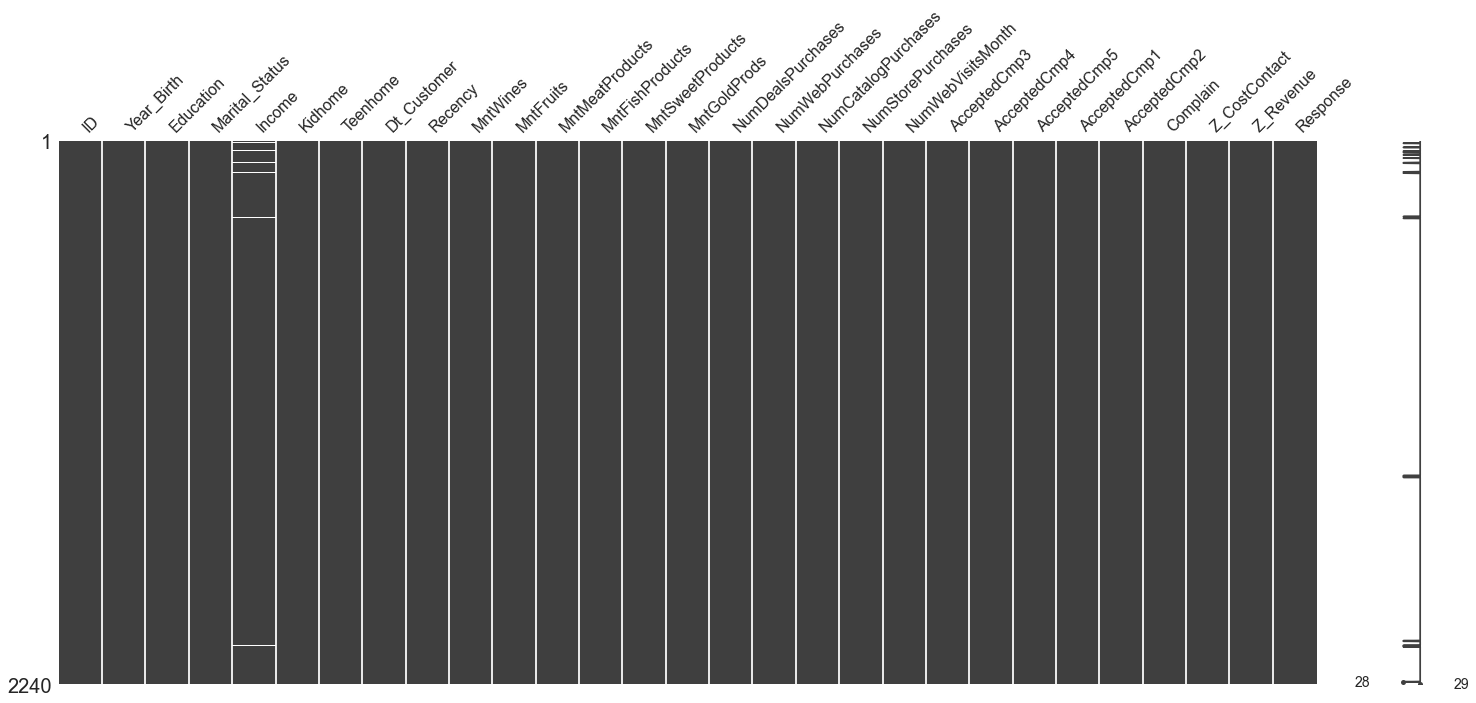

In [6]:
missingno.matrix(data)

In [7]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [10]:
data.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [11]:
data.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
dtype: object

In [12]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
latest = data['Dt_Customer'].max()
data['Dt_Customer'] = pd.to_numeric((latest - data['Dt_Customer']) / pd.Timedelta(1, unit='d'), downcast='integer')

<ipython-input-12-c8bddd14f0f2>:1: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
<ipython-input-12-c8bddd14f0f2>:1: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
<ipython-input-12-c8bddd14f0f2>:1: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
<ipython-input-12-c8bddd14f0f2>:1: UserWarning: Parsing '13-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
<ipython-input-12-c8bddd14f0f2>:1: UserWarning: Parsing '15-11-2013' in DD/MM/YYYY forma

In [13]:
data.describe()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1968.820397,52247.251354,0.441787,0.505415,512.006318,49.012635,305.091606,26.356047,166.995939,37.637635,...,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271
std,11.985554,25173.076661,0.536896,0.544181,232.469034,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,340.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,513.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,686.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,1063.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


`Year_Birth` : Customer's birth year

Switched `Year_Birth` to `Age`, which is customer's age

In [15]:
data['Year_Birth'] = 2015 - data['Year_Birth']
data.rename({'Year_Birth':'Age'}, axis=1, inplace=True)

In [14]:
from matplotlib.patches import Circle
from matplotlib.patheffects import withStroke

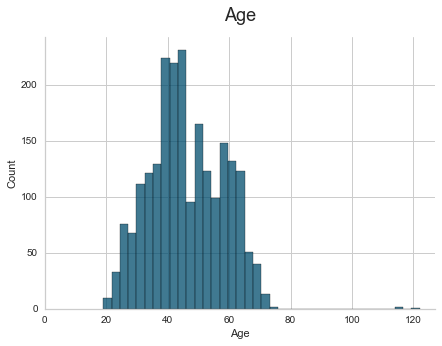

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
sns.histplot(x='Age', data=data, color='#004c6d')
ax.set_xlim(0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Age', fontdict={'fontsize':18}, pad=16);

In [16]:
data = data[data['Age'] < 100]

`Education` : Education Qualification of customer

In [17]:
palette = {
    'm2':['#004c6d','#ffa600'], 
    'm3':['#003f5c', '#bc5090', '#ffa600'], 
    'm4':['#003f5c', '#7a5195', '#ef5675', '#ffa600'], 
    'm5':['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600'], 
    'm8':['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087', '#f95d6a', '#ff7c43', '#ffa600'],
    's3':['#004c6d','#6996b3','#c1e7ff'], 
    's4':['#004c6d', '#4c7c9b', '#86b0cc', '#c1e7ff'], 
    's5':['#004c6d', '#3d708f', '#6996b3', '#94bed9', '#c1e7ff'], 
}

reverse = {}
for p in palette:
    reverse[p[0]+'r'+p[1]] = palette[p][::-1]

palette.update(reverse)

In [18]:
def countplot(x, orient='v', palette_type='m'):
    
    fig, ax = plt.subplots(1, 1, figsize=(7,5))
    
    if orient == 'v':
        sns.countplot(x=x, 
                      palette=palette[f'{palette_type}{data[x].nunique()}'], 
                      edgecolor='.5', 
                      data=data)
    else:
        sns.countplot(y=x, 
                      orient='h', 
                      palette=palette[f'{palette_type}{data[x].nunique()}'], 
                      edgecolor='.5', 
                      data=data)
    
    if orient == 'v':
        for p in ax.patches:
            ax.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', 
                        va='center', 
                        xytext=(0,5), 
                        textcoords='offset points')
    
    else:
        for p in ax.patches:
            ax.annotate(p.get_width(), 
                        (p.get_width(), p.get_y() + p.get_height() / 2.), 
                        ha='center', 
                        va='center', 
                        xytext=(10,0), 
                        textcoords='offset points')
        
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(x, fontdict={'fontsize':18}, pad=16);

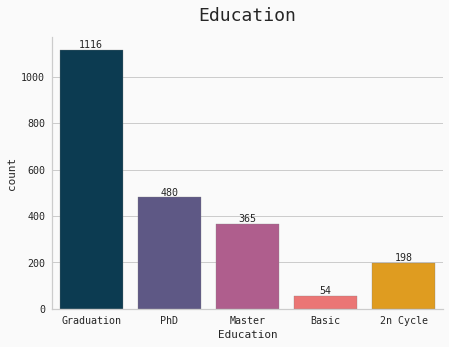

In [19]:
countplot('Education')

In [20]:
data['Education'] = data['Education'].replace(
    {'Basic':'Undergraduate',
     '2n Cycle':'Undergraduate', 
     'Graduation':'Graduate', 
     'Master':'Postgraduate', 
     'PhD':'Postgraduate'}
)

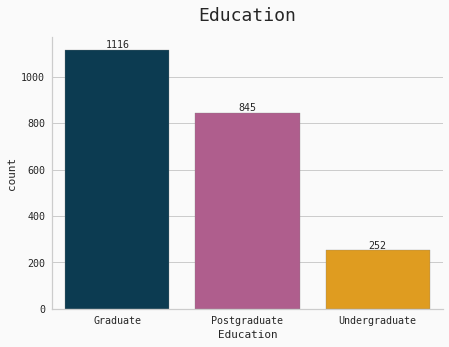

In [21]:
countplot('Education')

`Marital_Status` : Marital Status of customer

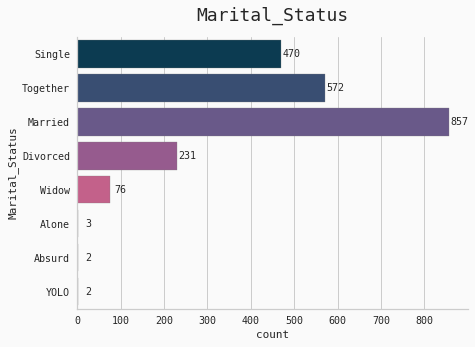

In [22]:
countplot('Marital_Status', 'h')

In [23]:
data['Marital_Status'] = data['Marital_Status'].replace(['Married', 'Together'], 'Together')
data['Marital_Status'] = data['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single')

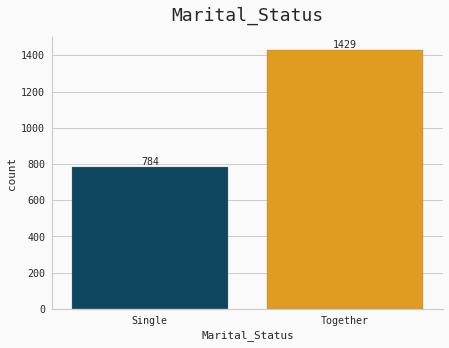

In [24]:
countplot('Marital_Status')

`Income`: Customer's yearly household income

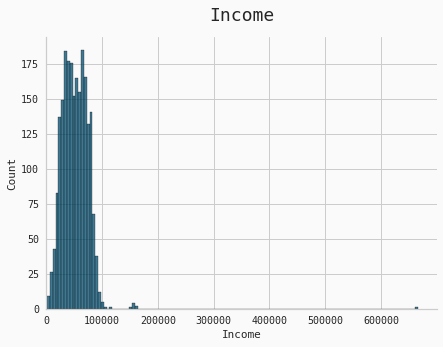

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
sns.histplot(x='Income', data=data, color='#004c6d')
ax.set_xlim(0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Income', fontdict={'fontsize':18}, pad=16);

In [26]:
data = data[data['Income'] < 200000]

`Kidhome`: Number of children in customer's household

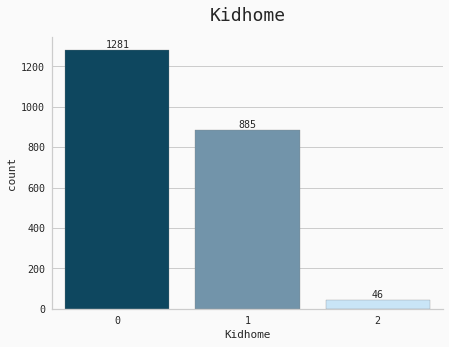

In [27]:
countplot('Kidhome', palette_type='s')

`Teenhome`: Number of teenagers in customer's household

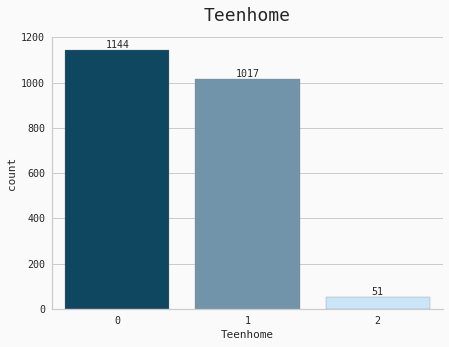

In [28]:
countplot('Teenhome', palette_type='s')

In [29]:
data['Childhome'] = data['Teenhome'] + data['Kidhome']

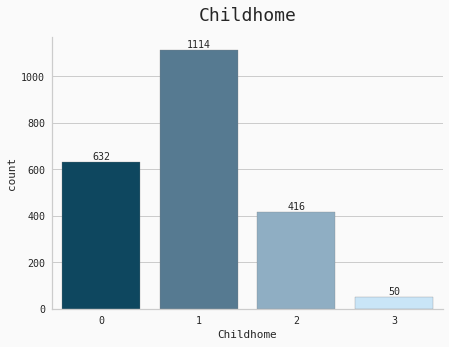

In [30]:
countplot('Childhome', palette_type='s')

In [31]:
data['Family_Size'] = data['Childhome'] + (data['Marital_Status'] == 'Together') + 1

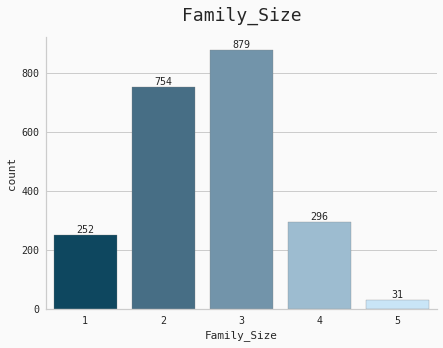

In [32]:
countplot('Family_Size', palette_type='s')

In [33]:
data.rename(
    {'MntWines':'Wines', 
     'MntFruits':'Fruits', 
     'MntMeatProducts':'Meat', 
     'MntFishProducts':'Fish', 
     'MntSweetProducts':'Sweet', 
     'MntGoldProds':'Gold'
    }, 
    axis=1, inplace=True
)

In [34]:
data['TotalPurchases'] = data['Wines'] + data['Fruits'] + data['Meat'] + data['Fish'] + data['Sweet'] + data['Gold']
data['NumTotalPurchases'] = data['NumDealsPurchases'] + data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']

In [35]:
data2 = data.copy()

data2['Marital_Status'] = data2['Marital_Status'].replace({'Single':0, 'Together':1})
data2['Education'] = data2['Education'].replace({'Undergraduate':0, 'Graduate':1, 'Postgraduate':2})
data2.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response'], axis=1, inplace=True)

In [36]:
scaler = StandardScaler()
data2 = pd.DataFrame(scaler.fit_transform(data2), columns=data2.columns)
data2

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,...,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Childhome,Family_Size,TotalPurchases,NumTotalPurchases
0,1.018352,-0.411675,-1.349603,0.287105,-0.822754,-0.929699,1.973583,0.310353,0.977660,1.552041,...,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,-1.264598,-1.758359,1.676245,1.317945
1,1.274785,-0.411675,-1.349603,-0.260882,1.040021,0.908097,-1.665144,-0.380813,-0.872618,-0.637461,...,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,1.404572,0.449070,-0.963297,-1.159273
2,0.334530,-0.411675,0.740959,0.913196,-0.822754,-0.929699,-0.172664,-0.795514,0.357935,0.570540,...,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,-1.264598,-0.654644,0.280110,0.796425
3,-1.289547,-0.411675,0.740959,-1.176114,1.040021,-0.929699,-1.923210,-0.795514,-0.872618,-0.561961,...,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,0.069987,0.449070,-0.920135,-0.898513
4,-1.033114,1.123949,0.740959,0.294307,1.040021,-0.929699,-0.822130,1.554453,-0.392257,0.419540,...,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,0.069987,0.449070,-0.307562,0.535666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,0.163575,-0.411675,0.740959,0.430444,-0.822754,0.908097,0.124112,-0.104347,1.197084,0.419540,...,3.928291,-0.168701,1.791619,0.111982,-0.555814,-0.132545,0.069987,0.449070,1.218061,0.405286
2208,1.958607,1.123949,0.740959,0.560123,2.902796,0.908097,-1.940414,0.241237,0.298631,-0.662628,...,-0.694954,2.429954,1.426865,-0.229679,-0.248141,0.692181,2.739158,2.656499,-0.271040,0.926805
2209,-1.033114,-0.411675,-1.349603,0.233347,-0.822754,-0.929699,-0.847936,1.450778,1.787156,0.545373,...,-0.385448,-0.688432,-0.761665,0.111982,2.213242,0.279818,-1.264598,-1.758359,1.052052,0.535666
2210,1.103830,1.123949,0.740959,0.803172,-0.822754,0.908097,-0.843635,-1.417564,0.363866,0.092373,...,0.330284,-0.168701,0.697355,0.795303,1.290224,-0.957271,0.069987,0.449070,0.391336,1.057185


In [37]:
def pca_threshold(threshold=0.95):
    pca = PCA()
    pca.fit(data2)
    
    n = data2.shape[1] + 1

    fig, ax = plt.subplots(figsize=(11,7))
    xi = np.arange(1, n, step=1)
    y = np.cumsum(pca.explained_variance_ratio_)

    plt.ylim(0.0,1.1)
    plt.plot(xi, y, marker='o', linestyle='--', color='b')

    plt.xlabel('Number of Components')
    plt.xticks(np.arange(0, n, step=1))
    plt.ylabel('Cumulative variance (%)')
    plt.title('The number of components needed to explain variance')

    plt.axhline(y=threshold, color='r', linestyle='-')
    plt.text(0.5, 0.85, f'{threshold} cut-off threshold', color = 'red', fontsize=16)

    plt.show()

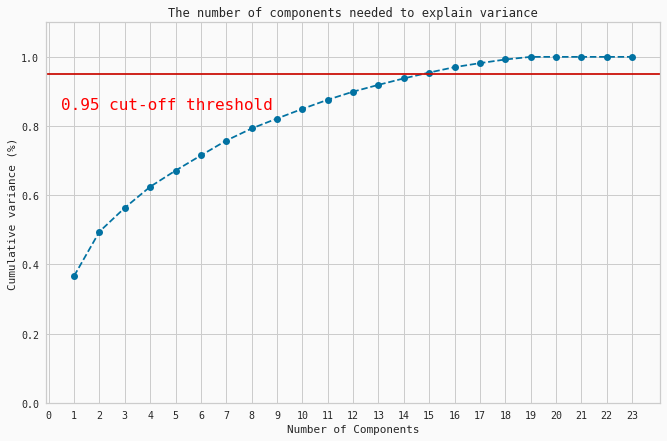

In [38]:
pca_threshold()

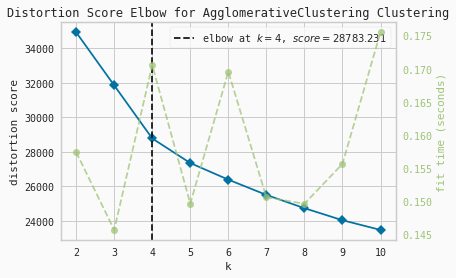

In [39]:
pca = PCA(n_components=15)
pca.fit(data2)
PCA_data = pd.DataFrame(pca.transform(data2))

KElbow = KElbowVisualizer(AgglomerativeClustering())
KElbow.fit(PCA_data)
KElbow.show();

In [40]:
model = AgglomerativeClustering(n_clusters=KElbow.elbow_value_)
yhat = model.fit_predict(PCA_data)
data["Cluster"]= yhat

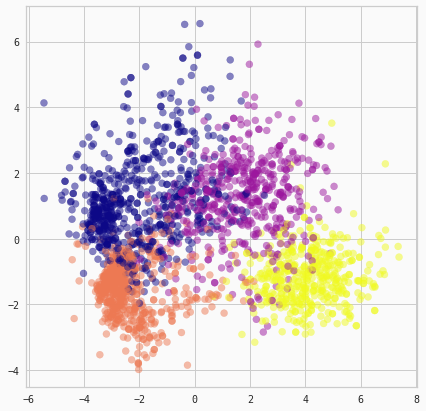

In [41]:
pca = PCA(n_components=2)
pca.fit(PCA_data)
PCA_data2 = pd.DataFrame(pca.transform(PCA_data), columns=(['x', 'y']))
PCA_data2["Cluster"]= yhat

fig = plt.figure(figsize=(7,7))
ax = plt.axes()
ax.scatter(PCA_data2['x'], PCA_data2['y'], c=PCA_data2['Cluster'], cmap='plasma', alpha=.5);

In [42]:
order = [f'Cluster {i+1}' for i in range(data['Cluster'].nunique())]
cluster = dict(zip(data.groupby('Cluster')['Income'].mean().sort_values().index, order))
data['Cluster'] = data['Cluster'].replace(cluster)

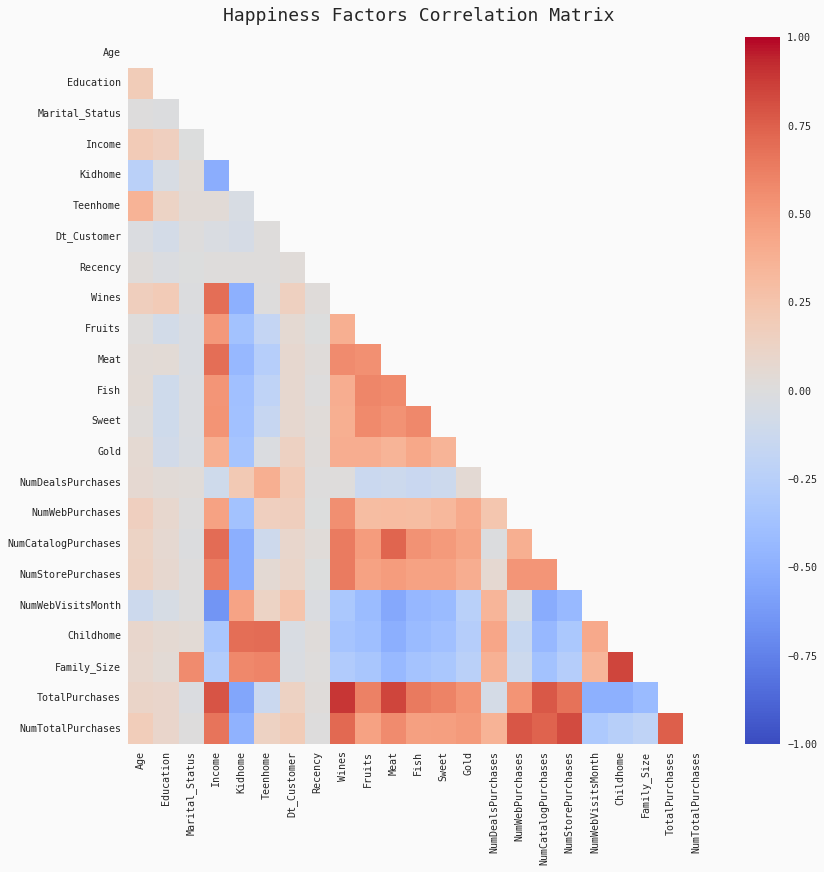

In [43]:
fig = plt.figure(figsize=(13,13))
mask = np.triu(np.ones_like(data2.corr(), dtype=np.bool))
ax = sns.heatmap(data2.corr(), mask=mask, vmin=-1, vmax=1, annot=False, cmap='coolwarm')
ax.set_title('Happiness Factors Correlation Matrix', fontdict={'fontsize':18}, pad=16);

In [44]:
order

['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

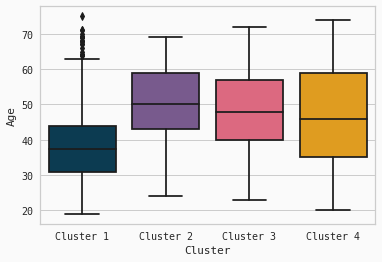

In [45]:
sns.boxplot(x='Cluster', 
            y='Age', 
            order=order, 
            palette=palette['m4'], 
            data=data);

<AxesSubplot:xlabel='Income', ylabel='Cluster'>

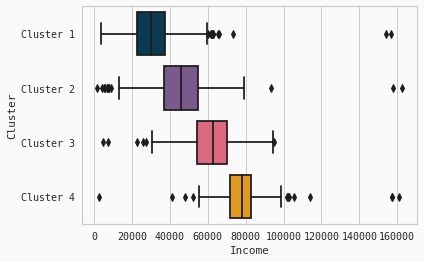

In [46]:
sns.boxplot(x='Income', 
            y='Cluster', 
            orient='h', 
            order=order, 
            palette=palette['m4'], 
            data=data)

In [47]:
def donutchart2(data, labels):
    _ = data[labels].value_counts()
    k, v = _.keys(), _.values
    
    fig, ax = plt.subplots()
    ax.pie(v, 
           labels=k, 
           autopct='%1.1f%%', 
           startangle=90, 
           wedgeprops = {'linewidth' : 7, 
                         'edgecolor' : 'white' })
    
    centre_circle = plt.Circle((0,0), 
                               0.70, 
                               fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    ax.axis('equal')  
    plt.tight_layout()

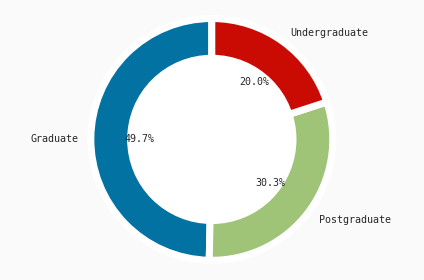

In [48]:
donutchart2(data[data['Cluster'] == 'Cluster 1'], 'Education')

In [49]:
def cluster_countplot(x, palette_type='m', hue_order=None, xytext=(0,5), 
                      dodge=True, annot=True, legend=True):
    
    fig, ax = plt.subplots(1, 1, figsize=(7,5))
    
    sns.countplot(x='Cluster', 
                  hue=x, 
                  hue_order=hue_order, 
                  order=[f'Cluster {i+1}' for i in range(data['Cluster'].nunique())], 
                  dodge=dodge, 
                  palette=palette[f'{palette_type}{data[x].nunique()}'], 
                  edgecolor='.5', 
                  data=data)
    
    if annot:
        for p in ax.patches:
            ax.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', 
                        va='center', 
                        xytext=xytext, 
                        textcoords='offset points')
    
    if legend:
        ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(x, fontdict={'fontsize':18}, pad=16);

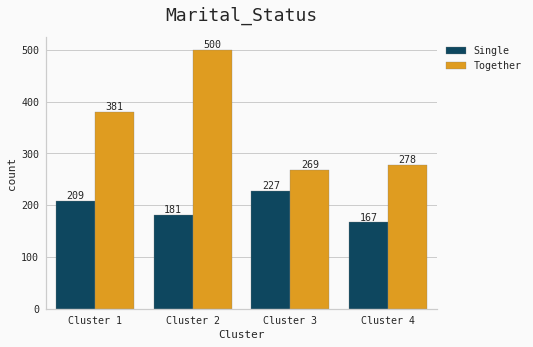

In [50]:
cluster_countplot('Marital_Status')

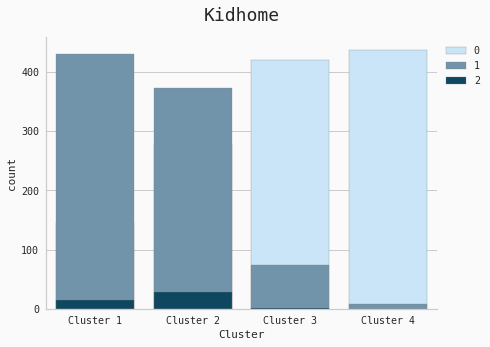

In [51]:
cluster_countplot('Kidhome', palette_type='sr', dodge=False, annot=False)

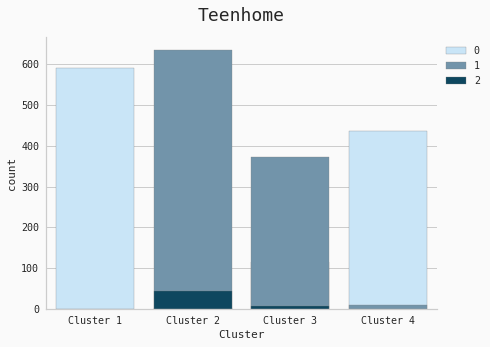

In [52]:
cluster_countplot('Teenhome', palette_type='sr', dodge=False, annot=False)

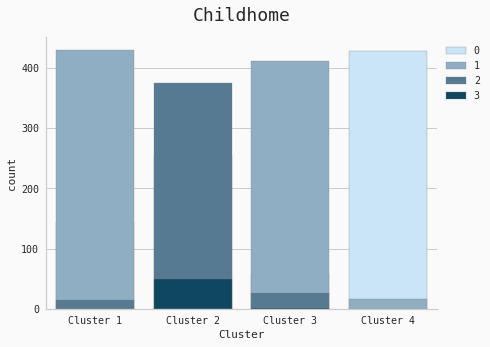

In [53]:
cluster_countplot('Childhome', palette_type='sr', dodge=False, annot=False)

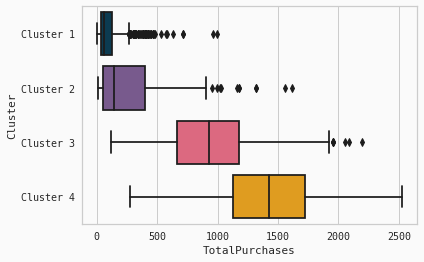

In [54]:
sns.boxplot(x='TotalPurchases', 
            y='Cluster', 
            orient='h', 
            order=order, 
            palette=palette['m4'], 
            data=data);

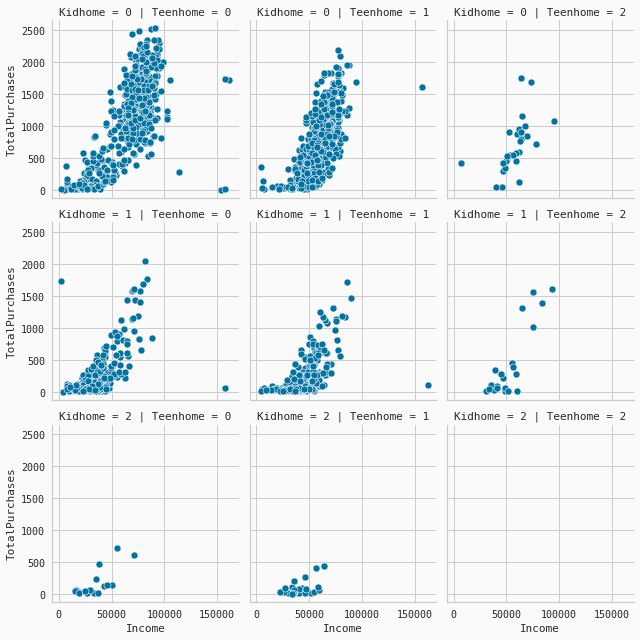

In [55]:
g = sns.FacetGrid(data, col="Teenhome", row='Kidhome')
g.map(sns.scatterplot, "Income", "TotalPurchases")
plt.tight_layout()

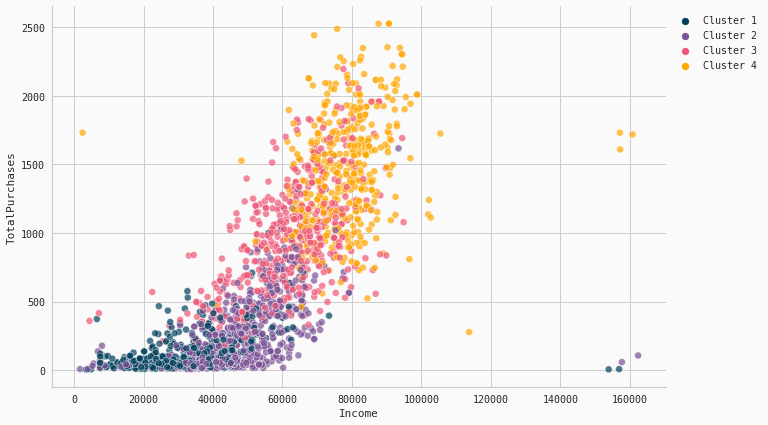

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(11,7))
sns.scatterplot(x='Income', 
                y='TotalPurchases',
                hue='Cluster', 
                hue_order=order, 
                palette=palette['m4'], 
                alpha=.7, 
                data=data)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left');

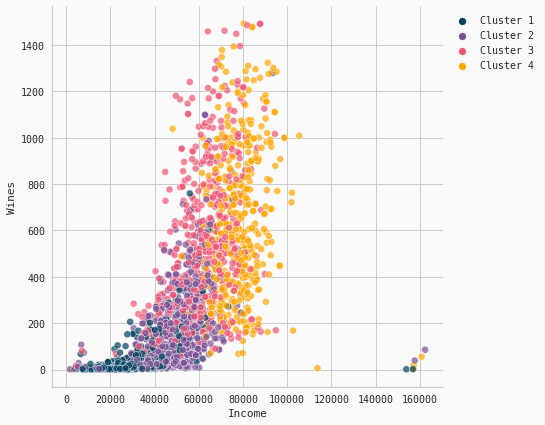

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))
sns.scatterplot(x='Income', 
                y='Wines',
                hue='Cluster', 
                hue_order=order, 
                palette=palette['m4'], 
                alpha=.7, 
                data=data)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left');

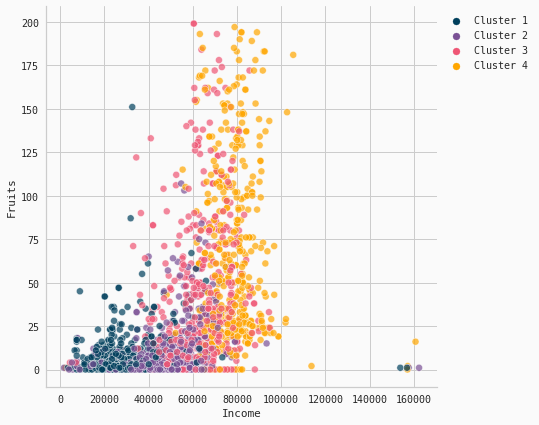

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))
sns.scatterplot(x='Income', 
                y='Fruits',
                hue='Cluster', 
                hue_order=order, 
                palette=palette['m4'], 
                alpha=.7, 
                data=data)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left');

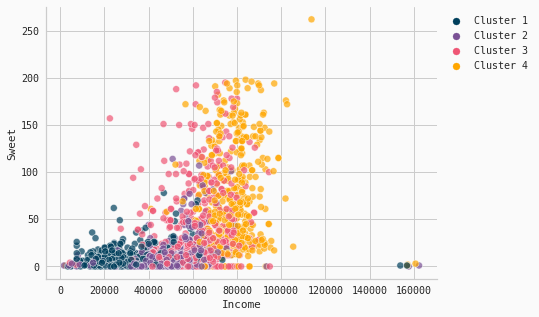

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
sns.scatterplot(x='Income', 
                y='Sweet',
                hue='Cluster', 
                hue_order=order, 
                palette=palette['m4'], 
                alpha=.7, 
                data=data)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left');

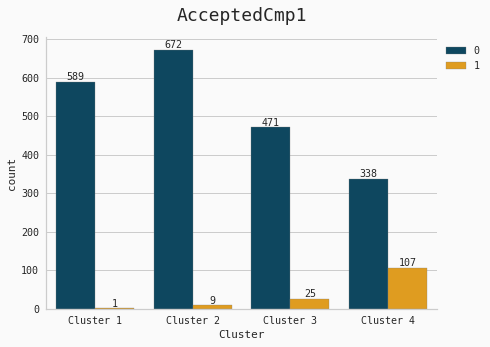

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
sns.countplot(x='Cluster', 
              hue='AcceptedCmp1', 
              order=order, 
              palette=palette['m2'], 
              edgecolor='.5', 
              data=data)

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 5), 
                   textcoords = 'offset points')
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.set_title('AcceptedCmp1', fontdict={'fontsize':18}, pad=16);

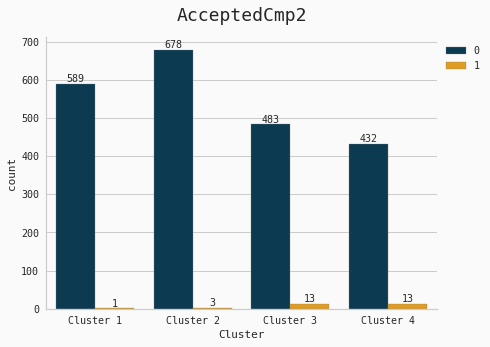

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
sns.countplot(x='Cluster', 
              hue='AcceptedCmp2', 
              order=order, 
              palette=['#003f5c', '#ffa600'], 
              edgecolor='.5', 
              data=data)

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 5), 
                   textcoords = 'offset points')
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.set_title('AcceptedCmp2', fontdict={'fontsize':18}, pad=16);

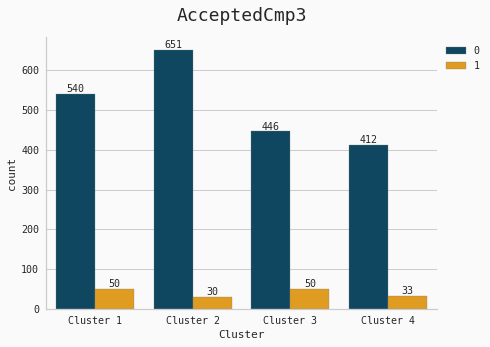

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
sns.countplot(x='Cluster', 
              hue='AcceptedCmp3', 
              order=order, 
              palette=palette['m2'], 
              edgecolor='.5', 
              data=data)

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 5), 
                   textcoords = 'offset points')
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.set_title('AcceptedCmp3', fontdict={'fontsize':18}, pad=16);

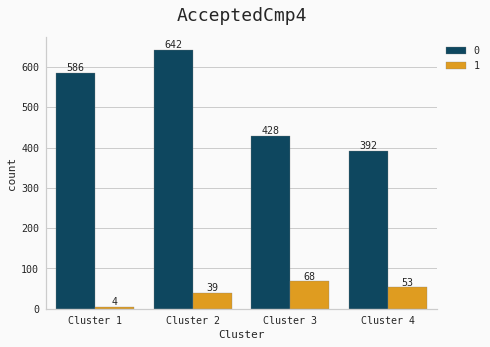

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
sns.countplot(x='Cluster', 
              hue='AcceptedCmp4', 
              order=order, 
              palette=palette['m2'], 
              edgecolor='.5', 
              data=data)

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 5), 
                   textcoords = 'offset points')
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.set_title('AcceptedCmp4', fontdict={'fontsize':18}, pad=16);

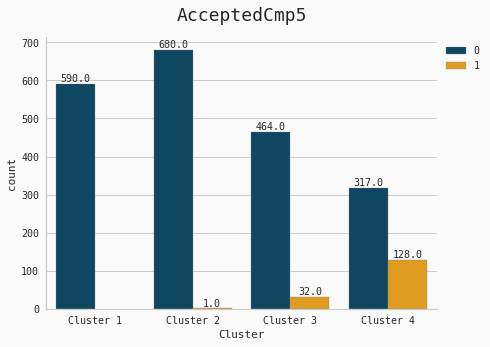

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
sns.countplot(x='Cluster', 
              hue='AcceptedCmp5', 
              order=order, 
              palette=palette['m2'], 
              edgecolor='.5', 
              data=data)

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 5), 
                   textcoords = 'offset points')
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.set_title('AcceptedCmp5', fontdict={'fontsize':18}, pad=16);

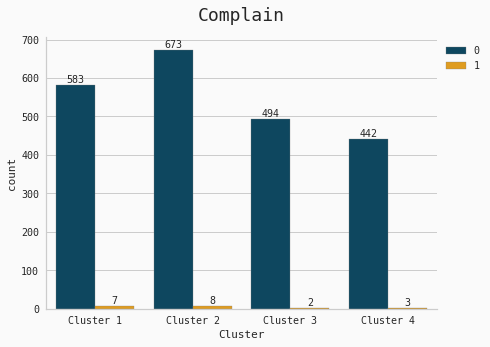

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
sns.countplot(x='Cluster', 
              hue='Complain', 
              order=order, 
              palette=palette['m2'], 
              edgecolor='.5', 
              data=data)

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 5), 
                   textcoords = 'offset points')
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.set_title('Complain', fontdict={'fontsize':18}, pad=16);

In [66]:
group = data.groupby('Cluster')
group['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
Cluster 1,590.0,30768.177966,13417.684622,3502.0,22597.25,29805.0,37483.25,156924.0
Cluster 2,681.0,46166.916300,14441.676675,1730.0,37070.00,46098.0,54984.00,162397.0
Cluster 3,496.0,61770.086694,12641.840531,4428.0,54097.75,62807.0,70309.25,94871.0
Cluster 4,445.0,77982.092135,11699.490201,2447.0,71488.00,78075.0,82800.00,160803.0


In [67]:
def donutchartc(labels):
    _ = c1.value_counts()
    k, v = _.keys(), _.values
    
    fig, ax = plt.subplots()
    ax.pie(v, 
           labels=k, 
           autopct='%1.1f%%', 
           startangle=90, 
           wedgeprops = {'linewidth' : 7, 
                         'edgecolor' : 'white' })
    
    centre_circle = plt.Circle((0,0), 
                               0.70, 
                               fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    ax.axis('equal')  
    plt.tight_layout()

In [68]:
c1 = data[data['Cluster'] == 'Cluster 1'][['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']].sum()
c1

Wines     22468
Fruits     4337
Meat      16721
Fish       6574
Sweet      4161
Gold      10498
dtype: int64

<AxesSubplot:ylabel='None'>

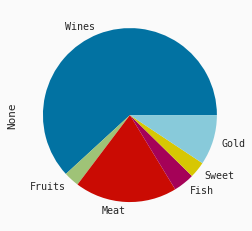

In [69]:
c2 = data[data['Cluster'] == 'Cluster 2']
c2[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']].sum().plot.pie()

<AxesSubplot:ylabel='None'>

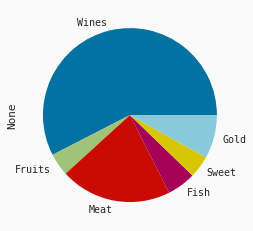

In [70]:
c3 = data[data['Cluster'] == 'Cluster 3']
c3[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']].sum().plot.pie()

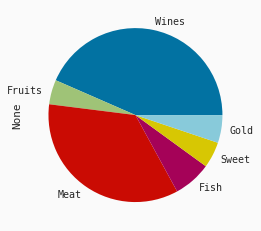

In [71]:
c4 = data[data['Cluster'] == 'Cluster 4']
c4[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']].sum().plot.pie();

In [72]:
c1[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases']].sum().plot.pie()

KeyError: "None of [Index(['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',\n       'NumStorePurchases'],\n      dtype='object')] are in the [index]"

In [ ]:
c2[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases']].sum().plot.pie()

In [ ]:
c3[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases']].sum().plot.pie()

In [ ]:
c4[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases']].sum().plot.pie()